## Random Forest Classifier for News dataset. 



In [182]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import log_loss, confusion_matrix

import math
import matplotlib.pyplot as plt
%matplotlib inline 
from datetime import datetime
# Import 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedKFold

In [183]:
import time
import os
import ast
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np

import itertools
import re
import seaborn as sns

import nltk
from nltk.corpus import stopwords

In [184]:
from sklearn.metrics import confusion_matrix, f1_score

In [185]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [186]:
pd.options.display.max_columns
pd.set_option("display.max_columns",100)

### Import data

In [187]:
#data = pd.read_csv("../data/dataFACEBOOK.csv", thousands=',')
data = pd.read_csv("../../FINAL/data/dataFACEBOOK.csv", thousands=',')
#data['Total Interactions'] = data['Total Interactions'].replace(',','.', regex=True).astype(float)

In [188]:
data = data.rename(columns={'difficulty': 'Difficulty','title_polarity': 'Title polarity', 
                          'length':'Length', 'anger':'Anger' , 'positivity': 'Positivity',
       'joy':'Joy', 'disgust':'Disgust', 'surprise':'Surprise', 'trust':'Trust', 'anticipation':'Anticipation', 
                                'sadness':'Sadness',
      'fear':'Fear', 'numbers':'Numbers', 'polarity': 'Polarity', 'lexical richness': 'Lexical richness',
       'cosine': 'Cosine Similarity', 'sad':'Sad_', 'happy': 'Happy', 'inspired': 'Inspired', 
                                'dont_care':'I do not care', 'annoyed':'Annoyed', 'amused':'Amused',
       'afraid':'Afraid', 'sentence length':'Sentence length', 'mistakes':'Mistakes', 'adjectives':'Adjectives',
       'diversity':'Diversity', 'balance':'Balance',  'Strong_subjectivity':'Strong subjectivity',
       'Weak_subjectivity':'Weak subjectivity', 
       'Anger_intensity': 'Anger intensity', 'Joy_intensity':'Joy intensity', 
                                'Sadness_intensity':'Sadness intensity',
       'Fear_intensity':'Fear intensity', 'caps_body':'Capitals in article'})

In [189]:
data
data.shape

(73036, 93)

In [190]:
data.isnull().any()

url         False
date        False
author      False
Title       False
Noimages    False
            ...  
0            True
1            True
"           False
?           False
quality     False
Length: 93, dtype: bool

In [192]:
data.columns

Index(['url', 'date', 'author', 'Title', 'Noimages', 'Publication', 'Length',
       'Difficulty', 'uniq_wds', 'char_count', 'avg_word', 'perc_uniq',
       'Sentence length', 'stopwords', 'Mistakes', '#links', 'Numbers',
       'first_person', 'mtld', 'msttr', 'hdd', 'Capitals in article', 'Anger',
       'Positivity', 'Joy', 'Disgust', 'Surprise', 'Trust', 'Anticipation',
       'Sadness', 'negative', 'Fear', 'density', 'Sad_', 'Happy', 'Inspired',
       'I do not care', 'Annoyed', 'Amused', 'Afraid', 'Polarity',
       'negativity_vader', 'neutrality_vader', 'positivity_vader',
       'subjectivity', 'No Celebs', 'Adjectives', 'cadence', 'No Animals',
       'No Crime', 'No Sensual', 'Entertainment', 'Diversity',
       'Total Interactions', 'Likes', 'Comments', 'Shares', 'Love', 'Wow',
       'Haha', 'Sad', 'Angry', 'Care', 'Message', 'Link', 'Overperforming',
       'Afinnity', 'Strong subjectivity', 'Weak subjectivity', 'Valence',
       'Arousal', 'Dominance', 'Anger intensity'

In [193]:
#data = data[data['Publication']!='NYT' ]

data.Noimages = data.Noimages.astype(float)

data["img/word"] = data['Noimages']/data['Length']

In [196]:
data['Publication'].value_counts()

DailyMail          16614
NYT                 9944
Independent         9678
Mirror              8174
Politico            7929
Star                7434
Washington Post     5309
Sun                 4296
Guardian            3658
Name: Publication, dtype: int64

In [197]:
data = data[[ 'url', 'Noimages', 'Publication', 'Length', 'Difficulty', 'first_person','Capitals in article', 
             'Anger', 'Positivity', 'Joy', 'Disgust', 'Surprise', 'Trust', 'Anticipation', 'Sadness', 'negative', 
             'Fear', 'density', 'Sad_', 'Happy', 'Inspired', 'I do not care', 'Annoyed', 'Amused', 'Afraid', 
             'Polarity', 'No Celebs', 'Adjectives', 'No Animals', 'No Crime', 'No Sensual', 'Entertainment', 
             'Diversity', 'Total Interactions', 'Likes', 'Comments', 'Shares', 'Love', 'Wow', 'Haha', 'Sad', 
             'Angry', 'Care', 'Overperforming', 'Strong subjectivity', 'Valence', 'Arousal', 'Dominance', 
             'Anger intensity', 'Joy intensity', 'Sadness intensity', 'Fear intensity', '#title_words', 
             'cursing',  'Title cursing', 'Subjectivity Message', 
             'Subjectivity Title', 'Caps Title', 'Caps Message', '!', '"', '?', 'quality', #'img/word'
            ] ].copy()

In [199]:
print(data1.corr()["Shares"].abs().sort_values(ascending=False))

Shares                 1.000000
#title_words           0.046505
Caps Message           0.039135
Difficulty             0.032933
density                0.028291
Caps Title             0.026471
Diversity              0.025327
negative               0.024200
Disgust                0.022283
Joy intensity          0.022261
Trust                  0.022141
first_person           0.021529
Capitals in article    0.020478
Fear                   0.019528
No Animals             0.019323
Fear intensity         0.019208
Positivity             0.016987
!                      0.016735
Sadness                0.016111
Entertainment          0.015996
"                      0.014990
quality                0.014783
Adjectives             0.014732
Afraid                 0.013430
Valence                0.013407
No Crime               0.012548
Surprise               0.010961
Anger                  0.010888
No Celebs              0.010197
Sadness intensity      0.009721
?                      0.008486
Anger in

In [200]:
data.isnull().sum().sum()

0

In [201]:
data= data.dropna()
data.shape

(73036, 63)

In [202]:
data['Shares'].describe([.80, .90, .91, .95])

count     73036.000000
mean        427.937757
std        1988.882168
min           0.000000
50%          66.000000
80%         309.000000
90%         789.000000
91%         895.000000
95%        1707.000000
max      120521.000000
Name: Shares, dtype: float64

In [203]:
data['Shares'].describe([.10, .15, .05])

count     73036.000000
mean        427.937757
std        1988.882168
min           0.000000
5%            3.000000
10%           7.000000
15%          11.000000
50%          66.000000
max      120521.000000
Name: Shares, dtype: float64

In [204]:
data['Shares'].describe()

count     73036.000000
mean        427.937757
std        1988.882168
min           0.000000
25%          21.000000
50%          66.000000
75%         219.000000
max      120521.000000
Name: Shares, dtype: float64

In [205]:
data[data['Shares'] <3].shape

(3549, 63)

In [206]:
data[data['Shares'] >1707].shape

(3650, 63)

In [207]:
data_good = data[data['Comments'] >1707] #'Total Interactions']>15000  ['Shares'] >1986
data_good.shape

(2545, 63)

In [208]:
data_good['engagement'] = 1

In [210]:
data_bad = data[data['Comments'] <3] 
data_bad.shape


(3512, 63)

In [211]:
data_bad['engagement'] = 0

In [212]:
#data_bad2 = data_bad.sample(11442)

## Concat the data

In [213]:
pdList = [data_bad, data_good]  # List of your dataframes
data= pd.concat(pdList)

In [214]:
data.shape

(6057, 64)

In [215]:
data['Subjectivity Title'] = pd.to_numeric(data['Subjectivity Title'], errors='coerce')

In [216]:
data['Subjectivity Message'] = pd.to_numeric(data['Subjectivity Message'], errors='coerce')

In [217]:
data.reset_index(drop=True, inplace=True)

In [218]:
features= ['Difficulty', 'Dominance', 'Diversity', 'Inspired',
       'Length', 'Valence', #'Fear','Anger', 'Joy', 'Sadness', 'Arousal', 'Afraid',  'Joy intensity', 
           'Anticipation', 'Strong subjectivity', 'first_person', 'Adjectives', 'I do not care',
       'Amused', 'Sad_', 'Annoyed','density', 'Surprise',  'Trust',  'Happy', 'Fear intensity', 'Disgust',
       'Sadness intensity', 
           'No Celebs','No Crime', 'No Sensual', 'No Animals', '#title_words', 'cursing', 
           'Subjectivity Title','Caps Title', 
           'Caps Message','"', '?'
          ]

In [219]:
data[features].describe()

,Difficulty,Dominance,Diversity,Inspired,Length,Valence,Arousal,Afraid,Joy intensity,Anticipation,Strong subjectivity,first_person,Adjectives,I do not care,Amused,Sad_,Annoyed,density,Surprise,Trust,Happy,Fear intensity,Disgust,Sadness intensity,No Celebs,No Crime,No Sensual,No Animals,#title_words,cursing,Subjectivity Title,Caps Title,Caps Message,"""",?
count,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,6057.000000,4933.000000,6057.000000,6057.000000,6057.000000,6057.000000
mean,53.752353,0.549199,3.885587,11.410721,616.001486,0.583394,0.471545,9.605998,0.197023,6.163036,0.043998,340.257484,0.135183,8.112379,8.802411,7.356137,3.848934,20.046136,3.323724,8.508274,11.609787,0.210272,2.424480,0.142691,0.588410,3.673766,0.971438,1.342084,14.240383,0.029883,0.066343,0.132244,0.081063,0.093611,0.039624
std,10.868453,0.036737,4.010095,3.873186,611.118318,0.042699,0.029713,3.653574,0.096030,2.430928,0.016585,46.010558,0.038380,3.154272,3.161723,3.402198,1.882218,6.015940,1.988240,3.951583,3.575834,0.110302,1.874362,0.081630,1.329904,6.143987,2.128860,4.037661,6.233380,0.243675,0.062437,0.365511,0.308188,0.291310,0.195089
min,7.000000,0.432742,0.000000,0.869565,104.000000,0.413617,0.345826,0.000000,0.000000,0.000000,0.000000,194.444444,0.022222,0.000000,0.000000,0.000000,0.000000,3.517588,0.000000,0.000000,1.775148,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.522966,1.000000,8.730159,318.000000,0.555529,0.452236,7.053942,0.128500,4.477612,0.032483,308.750000,0.109453,5.895197,6.586826,4.878049,2.538071,15.822785,1.886792,5.714286,9.146341,0.126941,1.081081,0.081517,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.547494,3.000000,10.945274,440.000000,0.581750,0.472116,9.128631,0.177240,5.844156,0.042542,338.028169,0.131356,7.755102,8.523909,6.880734,3.629032,19.597990,2.941176,7.943925,11.250000,0.200701,2.030457,0.132146,0.000000,2.000000,0.000000,0.000000,13.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.574612,5.000000,13.529412,709.000000,0.610638,0.491316,11.704835,0.247538,7.547170,0.054396,369.863014,0.157706,9.925926,10.571429,9.363296,4.929577,23.692308,4.320988,10.576923,13.716814,0.285192,3.370787,0.193794,1.000000,5.000000,1.000000,1.000000,15.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000
max,87.000000,0.692228,73.000000,30.104962,16229.000000,0.747030,0.582557,35.362319,0.631750,19.191919,0.120603,587.217044,0.578947,26.282723,28.822630,23.613963,19.117647,63.664921,14.540059,43.333333,33.014354,0.614750,15.533981,0.510313,23.000000,109.000000,32.000000,160.000000,47.000000,9.000000,0.500000,4.000000,4.000000,1.000000,1.000000


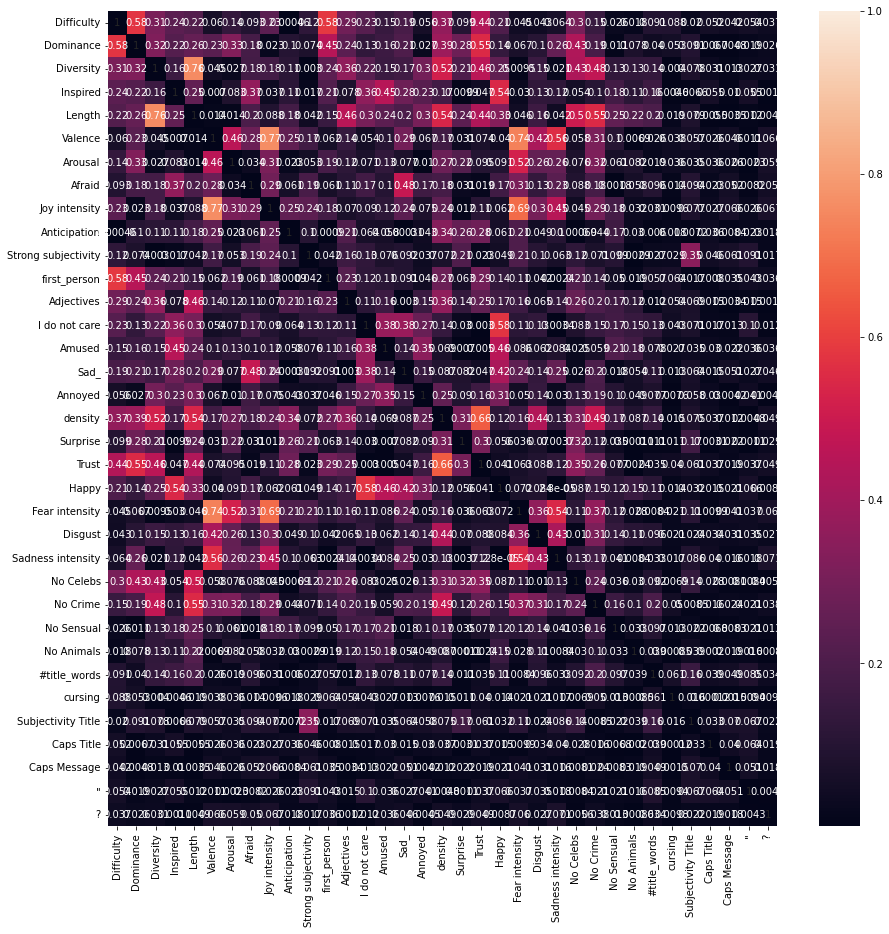

In [220]:
import math
import matplotlib.pyplot as plt
%matplotlib inline 

correlationMatrix = data[features].corr().abs()

plt.subplots(figsize=(15, 15))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

from scipy.cluster import hierarchy as hc
from scipy import linalg, optimize
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy

corr = np.round(scipy.stats.spearmanr(data[features]).correlation, 5)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,15))
dendrogram = hc.dendrogram(z, labels=data[features].columns, orientation='left', leaf_font_size=19)
plt.show()

In [221]:
data.isnull().values.any()

True

In [222]:
data.isnull().sum().sum()

2504

In [223]:
data.isnull().any()

url            False
Noimages       False
Publication    False
Length         False
Difficulty     False
               ...  
!              False
"              False
?              False
quality        False
engagement     False
Length: 64, dtype: bool

In [224]:
#nan_rows = data[data['Fear_intensity'].isnull()]
#nan_rows 

In [225]:
data = data.dropna()

# Model construction starts here

In [227]:
X = data[features]
y = data['engagement']

In [228]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=10)

In [229]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((3080, 35), (770, 35), (3080,), (770,))

# Logistic Regression

In [230]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

Y_pred_lr = lr.predict(X_val)

In [231]:
score_lr = round(accuracy_score(Y_pred_lr,y_val)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 84.55 %


In [232]:
#f1_score(y_val, Y_pred_lr, average='weighted')

In [233]:
print('Classification Report\n', classification_report(y_val, Y_pred_lr))

Classification Report
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       408
           1       0.86      0.80      0.83       362

    accuracy                           0.85       770
   macro avg       0.85      0.84      0.84       770
weighted avg       0.85      0.85      0.84       770



In [234]:
# Import 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Ξεκινήστε τη λίστα βαθμολογίας μοντέλου
model_score = []
# Δημιουργήστε μια λίστα με τις πραγματικές τιμές
true_labels = []
# Δημιουργήστε τη λίστα των προβλεπόμενων τιμών
predicted_labels = []
# Ορίστε το αντικείμενο σταυροειδούς επαλήθευσης (cv)
our_cv = RepeatedKFold(n_splits=10, n_repeats=10)
# Ορίστε το Logistic Regression 
log_reg = LogisticRegression(penalty='none', random_state=123, solver='saga', max_iter = 10000, warm_start=True)
# Λούπα που παράχθηκε από τα κοψίματα του cv
for i_train, i_test in our_cv.split(X):
    # Ορίστε τα σετς
    X_train, X_val, y_train, y_val = X.iloc[i_train], X.iloc[i_test], y.iloc[i_train], y.iloc[i_test]
    # Fitting του logistic regression
    log_reg.fit(X_train, y_train.astype('int'))
#    importances = pd.DataFrame(data={
#    'Attribute': X_train.columns,
#    'Importance': model.coef_[0]
#    })
#    importances = importances.sort_values(by='Importance', ascending=False)
    # Πρόβλεψη των δεδομένων του testing σετ
    y_pred_test = log_reg.predict(X_val)
    # Λήψη βαθμολογίας ακρίβειας
    model_score.append(accuracy_score(y_val.astype('int'), y_pred_test.astype('int')))
    # Προσθέστε τις αληθινές τιμές στη λίστα
    true_labels.extend(y_val.astype('int'))
    # Προσθέστε τις προβλεπόμενες τιμές στη λίστα
    predicted_labels.extend(y_pred_test.astype('int'))

In [235]:
#Υπολογίστε τη μέση ακρίβεια κατά την 10 x 10 σταυροειδή επαλήθευση
# Χρήση του μέσου όρου για 100 τιμές μέσα στο model_score
print("Η μέση ακρίβεια του μοντέλου λογιστικής παλινδρόμησης είναι: "+str(np.mean(model_score))+" %")

Η μέση ακρίβεια του μοντέλου λογιστικής παλινδρόμησης είναι: 0.8355584415584417 %


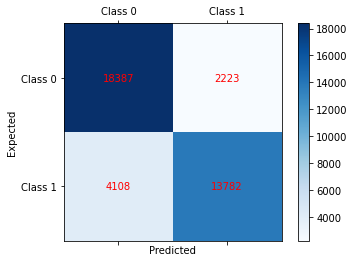

In [236]:
from sklearn.metrics import confusion_matrix
# Υπολογισμός 
conf_mat = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
# Ορισμός των labels 
labels = ['Class 0', 'Class 1']
# Ξεκινήστε ένα άδειο σχήμα
fig = plt.figure()
# Προσθέστε άξονα στο σχήμα
ax = fig.add_subplot(111)
# Προσθέστε τον πίνακα
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
# Εμφάνιση γραμμής χρωμάτων
fig.colorbar(cax)
# Αφαίρεση των x και y ticks
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
# Προσθέστε τα labels x και y
plt.xlabel('Predicted')
plt.ylabel('Expected')
# Προσθέστε νέα x και y ticks
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_mat[i, j], ha='center', va='center', color='r')
# Τυπώστε τον πίνακα
plt.show()

In [237]:
model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

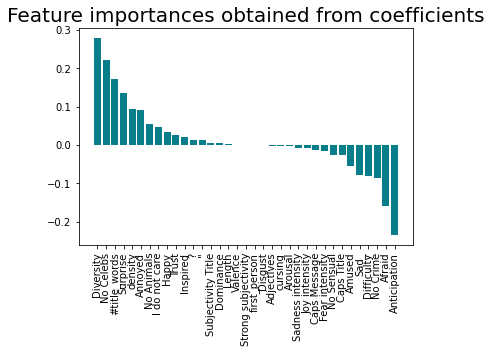

In [238]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

# SVM

In [239]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_val)

In [240]:
f1_score(y_val, Y_pred_svm, average='weighted')

0.872468982058023

# Study the Decision Tree Classifier

In [241]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import RepeatedKFold

In [242]:
estimator = DecisionTreeClassifier(criterion='gini', splitter='best', 
max_depth=8, min_samples_split=500, min_samples_leaf=500, 
min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
#min_impurity_split=None, 
class_weight=None, 
#presort='deprecated', 
ccp_alpha=0.0)

In [243]:
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=500, min_samples_split=500)

In [244]:
val_pred_probs = estimator.predict_proba(X_val)

val_pred = estimator.predict(X_val)

In [245]:
f1_score(y_val, val_pred, average='macro')

0.7811671087533156

In [246]:
leave_id = estimator.apply(X_val)
print("The number of nodes is ", estimator.tree_.node_count)

The number of nodes is  11


In [247]:
dataplus = pd.concat([X_val.reset_index(),y_val.reset_index(),pd.DataFrame(val_pred_probs, columns=['prob0', 'prob1'])['prob1'], pd.DataFrame(leave_id, columns=['node'])], axis = 1) #.columns =['prob', 'node']

In [248]:
dataplus.shape

(385, 40)

# Study now the Random Forest Classifier

In [252]:
rf = RandomForestClassifier()

In [253]:
#Get the best RF Classifier from the grid

In [254]:
rf = RandomForestClassifier()
grid = {'min_samples_leaf' : [15, 20], 'max_features' : ['auto'], 
        'min_samples_split' : [   40, 60]
       }
clf = GridSearchCV(rf, grid, cv=5)
clf.fit(X_train, y_train)
#best_clf = clf.best_estimator_

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto'], 'min_samples_leaf': [15, 20],
                         'min_samples_split': [40, 60]})

In [255]:
clf_val_pred_probs = clf.predict_proba(X_val)

clf_val_pred = clf.predict(X_val)

In [256]:
# Get the f1 Score of the best RF classifier of the grid

f1_score(y_val, clf_val_pred, average='macro')

0.849178689144648

In [257]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [258]:
print(classification_report(y_val, clf_val_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       195
           1       0.86      0.83      0.84       190

    accuracy                           0.85       385
   macro avg       0.85      0.85      0.85       385
weighted avg       0.85      0.85      0.85       385



# Lets Try a RF classifier selecting manually the parameters

In [259]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=20, min_samples_split=40,
            min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rf.fit(X_train, y_train)

val_pred_probs = rf.predict_proba(X_val)

val_pred = rf.predict(X_val)

In [260]:
import sklearn
print(sklearn.__version__)

1.0.2


In [261]:
train_pred_probs = rf.predict_proba(X_train)
train_pred = rf.predict(X_train)


In [262]:
log_loss(y_val, val_pred_probs, labels=rf.classes_)

0.3711866845650266

In [263]:
log_loss(y_train, train_pred_probs, labels=rf.classes_)

0.3051775953025398

In [264]:
f1_score(y_val, clf_val_pred, average='macro')

0.849178689144648

In [265]:
fi = pd.DataFrame(rf.feature_importances_, X_train.columns)
fi.columns = ['Importance']
fi.sort_values(by = 'Importance', ascending=False)[0:20]

,Importance
Length,0.143769
#title_words,0.133533
No Celebs,0.119586
Dominance,0.110778
Diversity,0.096904
Difficulty,0.085593
Trust,0.047188
density,0.035654
first_person,0.024303
Surprise,0.020277


f1_score(y_val, val_pred, average='macro')

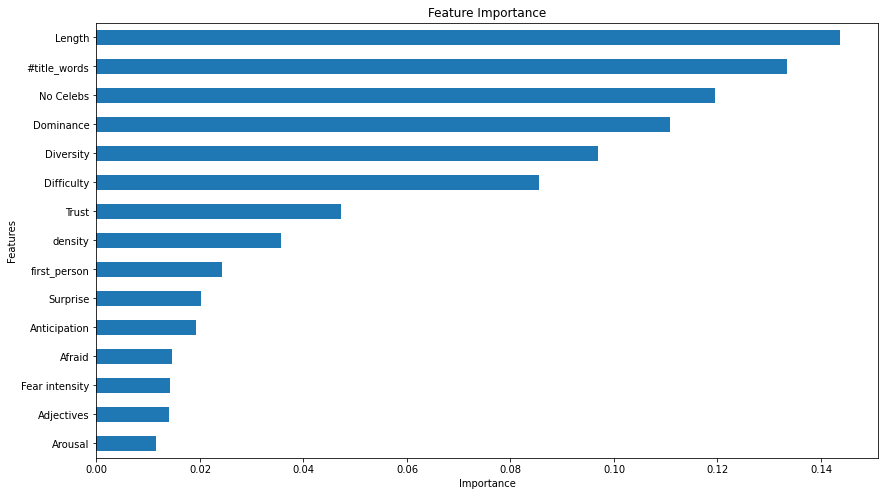

In [266]:
import matplotlib.pyplot as plt

plot = fi.sort_values(by = 'Importance', ascending=True).tail(15).plot.barh(figsize = (14,8), legend = False, title = 'Feature Importance', 
                                                                           )

#plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')

fig = plot.get_figure()
#fig.savefig('Importance_News_75.png')



In [267]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score




def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Automatically created module for IPython interactive environment


Confusion matrix, without normalization
[[172  23]
 [ 28 162]]


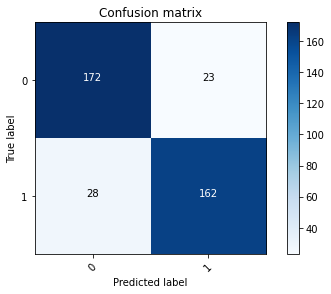

In [268]:
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_train, train_pred)

cnf_matrix = confusion_matrix(y_val, val_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=rf.classes_,
                      title='Confusion matrix')


In [269]:
# Check AGAIN the accurance of the manually defined RF classifier

f1_score(y_val, val_pred, average='macro')

0.8674430379746836

In [270]:
print(classification_report(y_val, clf_val_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       195
           1       0.86      0.83      0.84       190

    accuracy                           0.85       385
   macro avg       0.85      0.85      0.85       385
weighted avg       0.85      0.85      0.85       385



In [271]:
n_nodes = []
max_depths = []

for ind_tree in rf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Total number of Trees {int(len(rf.estimators_))}')
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')


Total number of Trees 2000
Average number of nodes 139
Average maximum depth 13


# visualizing the nth tree of the Random Forest (n=0)
import graphviz
from sklearn.tree import export_graphviz

#dot_data = export_graphviz(rf.estimators_[0])
graphviz.Source(export_graphviz(rf.estimators_[10],
                                out_file=None,
                                feature_names=features,
                                class_names=["0", "1"],
                                node_ids = True,
                                impurity=True))

In [273]:
MAX_ROUNDS = 180
OPTIMIZE_ROUNDS = True
LEARNING_RATE = 0.1
EARLY_STOPPING_ROUNDS = 55  
# Note: I set EARLY_STOPPING_ROUNDS high so that (when OPTIMIZE_ROUNDS is set)
#       I will get lots of information to make my own judgment.  You should probably
#       reduce EARLY_STOPPING_ROUNDS if you want to do actual early stopping.

In [274]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
#from numba import jit
import time
import gc

In [275]:
# Compute gini

# from CPMP's kernel https://www.kaggle.com/cpmpml/extremely-fast-gini-computation
#@jit
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = -eval_gini(labels, preds)
    return [('gini', gini_score)]



In [276]:
# Set up classifier
model = XGBClassifier(    
                        n_estimators=MAX_ROUNDS,
                        max_depth=8,
                        objective="binary:logistic",
                        learning_rate=LEARNING_RATE, 
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                     )

In [277]:
fit_model_xgb = model.fit(X_train,y_train)

In [278]:
val_pred_xgb = fit_model_xgb.predict(X_val)

Confusion matrix, without normalization
[[166  29]
 [ 22 168]]


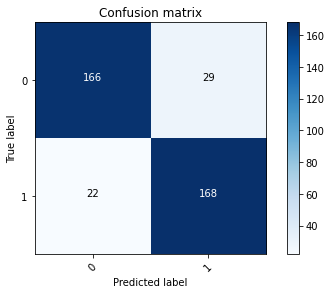

In [279]:
# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_train, train_pred)

cnf_matrix = confusion_matrix(y_val, val_pred_xgb)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=rf.classes_,
                      title='Confusion matrix')


In [280]:
f1_score(y_val, val_pred_xgb, average='macro')

0.867528892667031

In [281]:
print(classification_report(y_val, clf_val_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       195
           1       0.86      0.83      0.84       190

    accuracy                           0.85       385
   macro avg       0.85      0.85      0.85       385
weighted avg       0.85      0.85      0.85       385



In [282]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_val, clf_val_pred))


Accuracy :  0.8493506493506493


In [283]:
import eli5

In [284]:
eli5.show_prediction(rf, X_val[features].iloc[0], show_feature_values=True)

In [285]:
eli5.show_prediction(rf, X_val[features].iloc[1], show_feature_values=True)

In [286]:
eli5.explain_prediction(rf, data[features].iloc[1])

Explanation(estimator='RandomForestClassifier(min_samples_leaf=20, min_samples_split=40,\n                       n_estimators=2000, n_jobs=1)', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.5385226551226561, std=None, value=1.0), FeatureWeight(feature='Dominance', weight=0.07304616369013137, std=None, value=0.5216127946127944), FeatureWeight(feature='Difficulty', weight=0.07000173605647908, std=None, value=69.0), FeatureWeight(feature='No Celebs', weight=0.05046390996110257, std=None, value=0.0), FeatureWeight(feature='Trust', weight=0.0461910056506102, std=None, value=5.923836389280679), FeatureWeight(feature='#title_words', weight=0.043247569072284234, std=None, value=11.0), FeatureWeight(feature='density', weight=0.03305722887158964, std=None, value=18.05359661495064), FeatureWeight(feature='first_person', weight=0.026796028208680003, std=None, value=321.7934165720772), FeatureWeight(feature='Afraid', weight=0.018907204987320157, std=None, value=12.976022566995768), FeatureWeight(feature='Inspired', weight=0.012003676672918542, std=None, value=16.643159379407617), FeatureWeight(feature='Sadness intensity', weight=0.011705394466627826, std=None, value=0.18211724137931032), FeatureWeight(feature='Strong subjectivity', weight=0.009171944737108743, std=None, value=0.05942275042444821), FeatureWeight(feature='Surprise', weight=0.006343377955764385, std=None, value=2.8208744710860367), FeatureWeight(feature='Anticipation', weight=0.005843995625837405, std=None, value=5.077574047954866), FeatureWeight(feature='Joy intensity', weight=0.00552825426872628, std=None, value=0.29274482758620674), FeatureWeight(feature='Adjectives', weight=0.005438130975967697, std=None, value=0.13963328631875882), FeatureWeight(feature='Fear intensity', weight=0.003992056825697616, std=None, value=0.2054896551724137), FeatureWeight(feature='Subjectivity Title', weight=0.0025472854388226144, std=None, value=0.07692307692307693), FeatureWeight(feature='No Crime', weight=0.0009960339080469158, std=None, value=4.0), FeatureWeight(feature='No Sensual', weight=0.0005450555045550714, std=None, value=1.0), FeatureWeight(feature='?', weight=8.014235185049468e-05, std=None, value=0.0), FeatureWeight(feature='"', weight=6.0587101452220554e-05, std=None, value=0.0), FeatureWeight(feature='Disgust', weight=4.249022984350737e-05, std=None, value=2.6798307475317347), FeatureWeight(feature='Caps Message', weight=4.039972996890462e-06, std=None, value=0.0)], neg=[FeatureWeight(feature='Diversity', weight=-0.1521458737338825, std=None, value=8.0), FeatureWeight(feature='Length', weight=-0.14561803960309258, std=None, value=1762.0), FeatureWeight(feature='Annoyed', weight=-0.012807414146736, std=None, value=6.6290550070521865), FeatureWeight(feature='A

In [287]:
eli5.explain_weights(rf)

Weight,Feature
0.1438 ± 0.2697,x4
0.1335 ± 0.1368,x28
0.1196 ± 0.2664,x24
0.1108 ± 0.2345,x1
0.0969 ± 0.2196,x2
0.0856 ± 0.1911,x0
0.0472 ± 0.1399,x19
0.0357 ± 0.1100,x17
0.0243 ± 0.0754,x11
0.0203 ± 0.0440,x18


In [288]:
eli5.show_weights(fit_model_xgb, top = 10,feature_names = features)

Weight,Feature
0.2081,No Celebs
0.1230,Length
0.0977,#title_words
0.0843,Dominance
0.0670,Diversity
0.0538,Difficulty
0.0299,Trust
0.0235,Anticipation
0.0224,Afraid
0.0219,Arousal


In [289]:
eli5.show_weights(rf, top = 10,feature_names = features)

Weight,Feature
0.1438 ± 0.2697,Length
0.1335 ± 0.1368,#title_words
0.1196 ± 0.2664,No Celebs
0.1108 ± 0.2345,Dominance
0.0969 ± 0.2196,Diversity
0.0856 ± 0.1911,Difficulty
0.0472 ± 0.1399,Trust
0.0357 ± 0.1100,density
0.0243 ± 0.0754,first_person
0.0203 ± 0.0440,Surprise


In [290]:
#https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rf).fit(X_train,y_train)
eli5.show_weights(perm, top = 10,  feature_names = X_train.columns.tolist() )

Weight,Feature
0.1029 ± 0.0115,#title_words
0.0261 ± 0.0061,Length
0.0167 ± 0.0054,No Celebs
0.0164 ± 0.0073,Dominance
0.0140 ± 0.0056,Difficulty
0.0122 ± 0.0027,Diversity
0.0051 ± 0.0026,Trust
0.0051 ± 0.0009,density
0.0049 ± 0.0027,first_person
0.0043 ± 0.0019,Anticipation


In [291]:
fit_model_xgb.fit(X_train, y_train)
PI = PermutationImportance(fit_model_xgb, scoring='f1_weighted').fit(X_val, y_val)
eli5.show_weights(PI, feature_names = X_train.columns.tolist())

Weight,Feature
0.1228 ± 0.0368,#title_words
0.0251 ± 0.0079,Length
0.0116 ± 0.0183,No Celebs
0.0078 ± 0.0189,Diversity
0.0057 ± 0.0051,Anticipation
0.0042 ± 0.0121,Dominance
0.0036 ± 0.0078,Fear intensity
0.0010 ± 0.0026,Subjectivity Title
0.0010 ± 0.0062,Surprise
0.0010 ± 0.0041,Adjectives


In [ ]:
from treeinterpreter import treeinterpreter as ti

In [ ]:
prediction, bias, contributions = ti.predict(rf, X_val[features])


In [ ]:
prediction

In [190]:
prediction1, bias1, contributions1 = ti.predict(rf, X_val[features])


In [191]:
L = []

for pred, bias, contr in zip(prediction1, bias1, contributions1):
    d = {"pred0" : round(pred[0],2)}
    for c, feature in zip(contr,features):
       d.update({feature:round(c[0],2)})
#      print(feature, round(c[0],2))
    L.append(d)
ContributionsClass_df = pd.DataFrame(L)   


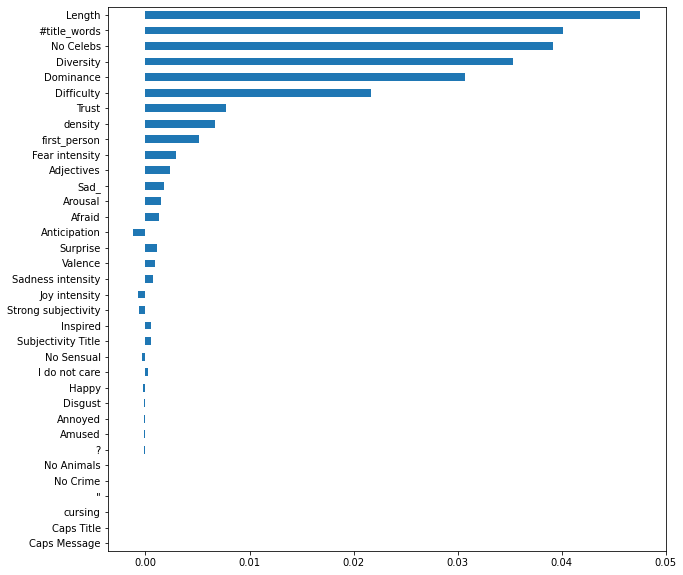

In [192]:
plot = ContributionsClass_df[ContributionsClass_df['pred0']>0.5][features].mean().reindex(ContributionsClass_df[ContributionsClass_df['pred0']>0.5][features].mean().
           abs().sort_values(ascending=True).index).plot(kind='barh', figsize=(10,10))
fig = plot.get_figure()
#fig.savefig('Importance_News_tree for Class 0_75.png')

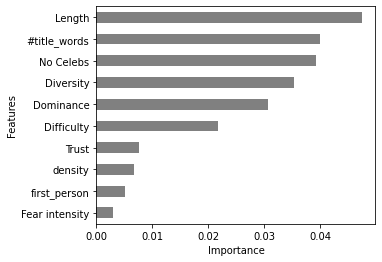

In [193]:
import matplotlib.pyplot as plt


plot = ContributionsClass_df[ContributionsClass_df['pred0']>0.5][features].mean().reindex(ContributionsClass_df[ContributionsClass_df['pred0']>0.5][features].mean().
           abs().sort_values(ascending=True).index).tail(10).plot(kind='barh', figsize=(5,4),color= 'grey')

plt.xlabel('Importance')
plt.ylabel('Features')

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
fig = plot.get_figure()
fig.savefig('Baseline.png', dpi=1000, bbox_inches='tight')
#fig.savefig('Importance_News_tree for Class 75.png')

In [194]:
L = []

for pred, bias, contr in zip(prediction1, bias1, contributions1):
    d = {"pred1" : round(pred[1],2)}
    for c, feature in zip(contr,features):
       d.update({feature:round(c[1],2)})
#      print(feature, round(c[0],2))
    L.append(d)
ContributionsClassOne_df = pd.DataFrame(L)   


In [195]:
ContributionsClassOne_df[ContributionsClassOne_df['pred1']>0.5][features].mean().reindex(ContributionsClassOne_df[ContributionsClassOne_df['pred1']>0.5][features].mean().abs().sort_values(ascending=False).index)

#title_words           0.067073
Length                 0.042683
Diversity              0.032317
No Celebs              0.031829
Dominance              0.030610
Difficulty             0.027073
Trust                  0.012012
density                0.007317
first_person           0.006280
Surprise               0.004024
Anticipation           0.003963
Afraid                 0.001951
Adjectives             0.001829
Sadness intensity      0.001646
No Animals             0.001159
Fear intensity         0.001098
Subjectivity Title     0.000976
Disgust               -0.000793
Sad_                   0.000671
Annoyed                0.000610
Valence               -0.000610
Inspired               0.000549
Strong subjectivity    0.000427
Joy intensity          0.000366
Happy                  0.000366
I do not care         -0.000366
No Crime              -0.000244
Arousal               -0.000183
Caps Title             0.000000
Caps Message           0.000000
No Sensual             0.000000
Amused  

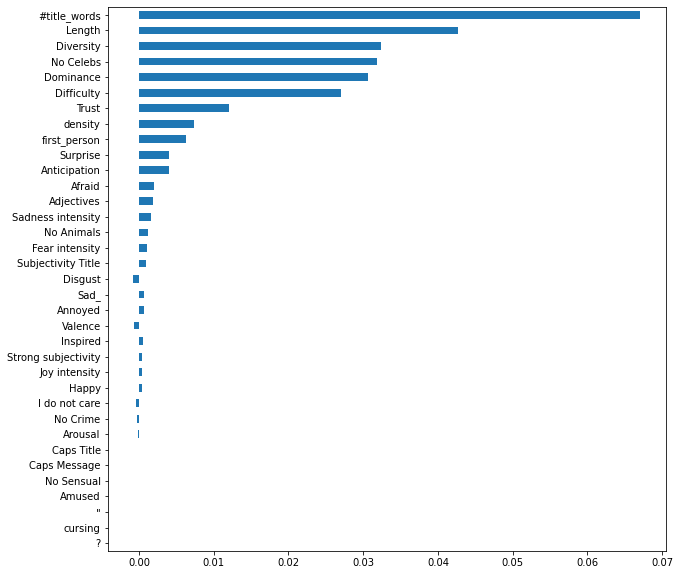

In [196]:
plot = ContributionsClassOne_df[ContributionsClassOne_df['pred1']>0.5][features].mean().reindex(ContributionsClassOne_df[ContributionsClassOne_df['pred1']>0.5][features].mean().
           abs().sort_values(ascending=True).index).plot(kind='barh', figsize=(10,10))
fig = plot.get_figure()
#fig.savefig('Importance_News_tree for Class 1_75.png')

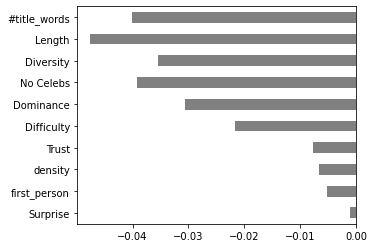

In [197]:
plot = ContributionsClassOne_df[ContributionsClassOne_df['pred1']<0.5][features].mean().reindex(ContributionsClassOne_df[ContributionsClassOne_df['pred1']>0.5][features].mean().
           abs().sort_values(ascending=True).index).tail(10).plot(kind='barh', figsize=(5,4),color= 'grey')
fig = plot.get_figure()
fig.savefig('Importance_News_tree_small for Class 1_75.png')


